## 1.3.2 Arithmetic Operations on Images

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [48]:
def convert_gbr2rgb(x):
    b, g, r = cv2.split(x)
    return cv2.merge((r, g, b))

def plt_imshow(image, converter=None, title=None):
    if converter:
        image = converter(image)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    if title:
        plt.title(title)
    #plt.show()

In [2]:
x = 250
y = 10
x + y

260

In [3]:
x = np.uint8([250]) # unsigned int 8bit char 1 byte

In [4]:
x

array([250], dtype=uint8)

In [5]:
x + y

array([4], dtype=uint8)

In [6]:
cv2.add(x, y)

array([[255]], dtype=uint8)

In [7]:
cv2.add(np.uint8([250]),
        np.uint8([10]))

array([[255]], dtype=uint8)

In [8]:
img1 = cv2.imread('t1.png')
img2 = cv2.imread('t2.png')

def on_change(value):
    value /= 255.
    dst = cv2.addWeighted(img1, value, img2, 1 - value, 0)
    cv2.imshow('image', dst)
    
cv2.imshow('image', img1)
cv2.createTrackbar('Blend', 'image', 0, 255, on_change)

while k := cv2.waitKey(2) & 0xFF:
    if k == 27:
        break

cv2.destroyAllWindows()
cv2.waitKey(1)


[ WARN:0] global /private/var/folders/b7/g6qfbypj0tq32j5_trjh516r0000gn/T/pip-req-build-oqad5xi3/opencv/modules/highgui/src/window.cpp (704) createTrackbar UI/Trackbar(Blend@image): Using 'value' pointer is unsafe and deprecated. Use NULL as value pointer. To fetch trackbar value setup callback.


-1

In [10]:
img1 = cv2.imread('download.png')
img2 = cv2.imread('t4.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

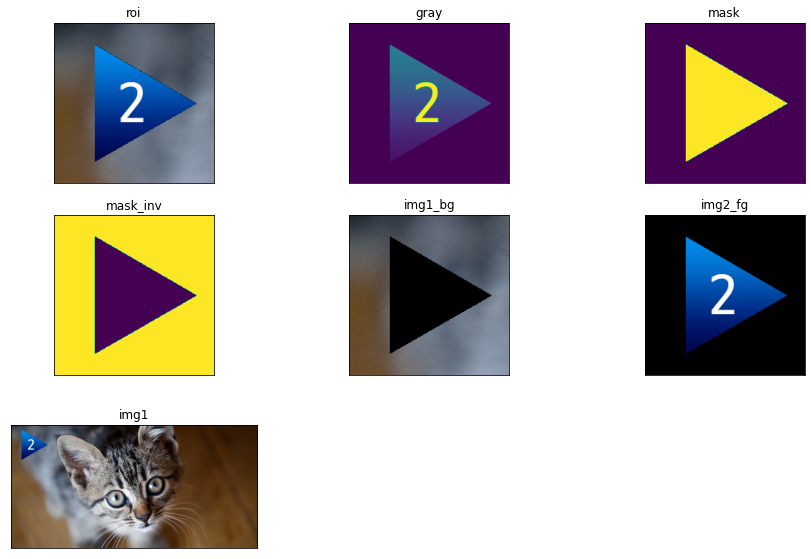

In [52]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.subplot(331)
plt_imshow(roi, title='roi', converter=convert_gbr2rgb)

plt.subplot(332)
plt_imshow(img2gray, title='gray')

plt.subplot(333)
plt_imshow(mask, title='mask')

plt.subplot(334)
plt_imshow(mask_inv, title='mask_inv')

plt.subplot(335)
plt_imshow(img1_bg, title='img1_bg', converter=convert_gbr2rgb)

plt.subplot(336)
plt_imshow(img2_fg, title='img2_fg', converter=convert_gbr2rgb)

plt.subplot(337)
plt_imshow(img1, title='img1', converter=convert_gbr2rgb)

plt.show()